In [1]:
import pandas as pd

# Load raw dataset
df = pd.read_csv(r"C:\Users\Shimra\Desktop\EmotiSense\emotion_data.csv.csv")

# Rename messy columns to clean labels
df.rename(columns={
    ' 1. Joy\n (e.g., Lecturer ended class 30 minutes-early blessing!.)': 'Joy',
    '2.Sadness  \n (e.g., Missed the scholarship by just 1 mark.)': 'Sadness',
    '3. Anger  \n (e.g.,  Lecturer canceled the class last minute again!)': 'Anger',
    '4. Fear  \n (e.g., Viva starts in 5 minutes. I\'m shaking.)': 'Fear',
    '5. Neutral  \n (e.g., Had lunch and attended lectures.)': 'Neutral'
}, inplace=True)

# Keep only emotion columns
emotion_df = df[['Joy', 'Sadness', 'Anger', 'Fear', 'Neutral']]

# Save cleaned dataset
emotion_df.to_csv(r"C:\Users\Shimra\Desktop\EmotiSense\processed\cleaned_emotion_data.csv", index=False)

print("✅ Cleaned emotion data saved successfully!")
print(emotion_df.head())

✅ Cleaned emotion data saved successfully!
                                                 Joy  \
0  I finally passed the exam I was so stressed about   
1  Alhamdulillah! I finally got an A for my proje...   
2                          Tomarrow's lecture cancel   
3                                    I am so excited   
4  I’m so happy today! I passed all my subjects i...   

                                             Sadness  \
0                 I didn't do well on the assignment   
1  I’ve been crying alone in my room… nothing see...   
2               I am just tired of everything lately   
3                                  Feeling low today   
4  I didn’t do well on my test... feeling really ...   

                                               Anger  \
0  I did all the work, and my groupmates did noth...   
1  I worked so hard and still didn’t get selected...   
2                              Why is this so unfair   
3                             That was really unfair   
4  

In [2]:
import pandas as pd

# Load cleaned data
file_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\cleaned_emotion_data.csv"
df = pd.read_csv(file_path)

# Convert from wide to long format
df_long = df.melt(var_name="emotion", value_name="text")

# Remove rows with missing values
df_long = df_long.dropna().reset_index(drop=True)

# Save reshaped dataset
output_path =r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_long.csv"
df_long.to_csv(output_path, index=False)

print("✅ Reshaped dataset saved successfully!")
print(df_long.head())

✅ Reshaped dataset saved successfully!
  emotion                                               text
0     Joy  I finally passed the exam I was so stressed about
1     Joy  Alhamdulillah! I finally got an A for my proje...
2     Joy                          Tomarrow's lecture cancel
3     Joy                                    I am so excited
4     Joy  I’m so happy today! I passed all my subjects i...


In [3]:
import pandas as pd

# Load reshaped dataset
file_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_long.csv"
df_long = pd.read_csv(file_path)

# Reorder columns: text first, then emotion
df_long = df_long[['text', 'emotion']]

# Overwrite the same file with new order
df_long.to_csv(file_path, index=False)

print("✅ Column order fixed: [text, emotion]")
print(df_long.head())

✅ Column order fixed: [text, emotion]
                                                text emotion
0  I finally passed the exam I was so stressed about     Joy
1  Alhamdulillah! I finally got an A for my proje...     Joy
2                          Tomarrow's lecture cancel     Joy
3                                    I am so excited     Joy
4  I’m so happy today! I passed all my subjects i...     Joy


In [4]:
import pandas as pd

# Load the reshaped dataset
file_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_long.csv"
df_long = pd.read_csv(file_path)

# Convert text column to lowercase
df_long['text'] = df_long['text'].str.lower()

# Save as a new file in the same folder
output_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_lowercase.csv"
df_long.to_csv(output_path, index=False)

print(f"✅ Lowercased dataset saved successfully in:\n{output_path}")
print(df_long.head())

✅ Lowercased dataset saved successfully in:
C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_lowercase.csv
                                                text emotion
0  i finally passed the exam i was so stressed about     Joy
1  alhamdulillah! i finally got an a for my proje...     Joy
2                          tomarrow's lecture cancel     Joy
3                                    i am so excited     Joy
4  i’m so happy today! i passed all my subjects i...     Joy


In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Load the lowercased dataset
file_path =r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_lowercase.csv"
df = pd.read_csv(file_path)

# Download tokenizer package (run once)
nltk.download('punkt')

# Tokenize each message
df['tokens'] = df['text'].astype(str).apply(word_tokenize)

# Save tokenized dataset
output_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_tokenized.csv"
df.to_csv(output_path, index=False)

print("✅ Tokenization done and saved at:", output_path)
print(df[['text', 'tokens']].head())

✅ Tokenization done and saved at: C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_tokenized.csv
                                                text  \
0  i finally passed the exam i was so stressed about   
1  alhamdulillah! i finally got an a for my proje...   
2                          tomarrow's lecture cancel   
3                                    i am so excited   
4  i’m so happy today! i passed all my subjects i...   

                                              tokens  
0  [i, finally, passed, the, exam, i, was, so, st...  
1  [alhamdulillah, !, i, finally, got, an, a, for...  
2                    [tomarrow, 's, lecture, cancel]  
3                               [i, am, so, excited]  
4  [i, ’, m, so, happy, today, !, i, passed, all,...  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shimra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Load tokenized dataset
file_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_tokenized.csv"
df = pd.read_csv(file_path)

# Convert tokens column back to list (from string format in CSV)
import ast
df['tokens'] = df['tokens'].apply(ast.literal_eval)

# Download stopwords if not already done
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords
df['tokens_no_stop'] = df['tokens'].apply(lambda x: [w for w in x if w not in stop_words])

# Save
output_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_no_stopwords.csv"
df.to_csv(output_path, index=False)

print("✅ Stopword removal done and saved at:", output_path)
print(df[['tokens', 'tokens_no_stop']].head())

✅ Stopword removal done and saved at: C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_no_stopwords.csv
                                              tokens  \
0  [i, finally, passed, the, exam, i, was, so, st...   
1  [alhamdulillah, !, i, finally, got, an, a, for...   
2                    [tomarrow, 's, lecture, cancel]   
3                               [i, am, so, excited]   
4  [i, ’, m, so, happy, today, !, i, passed, all,...   

                                      tokens_no_stop  
0                  [finally, passed, exam, stressed]  
1  [alhamdulillah, !, finally, got, project, ., '...  
2                    [tomarrow, 's, lecture, cancel]  
3                                          [excited]  
4  [’, happy, today, !, passed, subjects, exam, !...  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shimra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Load stopword removed dataset
file_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_no_stopwords.csv"
df = pd.read_csv(file_path)

# Convert tokens column back to list
import ast
df['tokens_no_stop'] = df['tokens_no_stop'].apply(ast.literal_eval)

# Download WordNet data if not already
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Apply lemmatization
df['tokens_lemmatized'] = df['tokens_no_stop'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

# Save
output_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_lemmatized.csv"
df.to_csv(output_path, index=False)

print("✅ Lemmatization done and saved at:", output_path)
print(df[['tokens_no_stop', 'tokens_lemmatized']].head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shimra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Shimra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


✅ Lemmatization done and saved at: C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_lemmatized.csv
                                      tokens_no_stop  \
0                  [finally, passed, exam, stressed]   
1  [alhamdulillah, !, finally, got, project, ., '...   
2                    [tomarrow, 's, lecture, cancel]   
3                                          [excited]   
4  [’, happy, today, !, passed, subjects, exam, !...   

                                   tokens_lemmatized  
0                  [finally, passed, exam, stressed]  
1  [alhamdulillah, !, finally, got, project, ., '...  
2                    [tomarrow, 's, lecture, cancel]  
3                                          [excited]  
4  [’, happy, today, !, passed, subject, exam, !,...  


In [8]:
import pandas as pd
import ast
import re

# Load lemmatized dataset
file_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_lemmatized.csv"
df = pd.read_csv(file_path)

# Convert string lists back to Python lists
df['tokens_lemmatized'] = df['tokens_lemmatized'].apply(ast.literal_eval)

# Join tokens back into text
df['clean_text'] = df['tokens_lemmatized'].apply(lambda x: " ".join(x))

# --- EXTRA CLEANING ---

# 1. Remove emojis & non-ASCII characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

# 2. Remove punctuation
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# 3. Remove extra spaces
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# 4. Drop empty rows
df = df[df['clean_text'].str.strip() != ""]

# 5. Drop very short messages (<= 2 words or <= 3 characters)
df = df[df['clean_text'].apply(lambda x: len(x.split()) > 2 and len(x) > 3)]

# Save final cleaned dataset
output_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_final_cleaned.csv"
df.to_csv(output_path, index=False)

print("✅ Final cleaned dataset saved at:", output_path)
print(df[['clean_text']].head(10))

✅ Final cleaned dataset saved at: C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_final_cleaned.csv
                                           clean_text
0                        finally passed exam stressed
1           alhamdulillah finally got project m happy
2                           tomarrow s lecture cancel
4                     happy today passed subject exam
7                             finished book feel good
9   surprise lunch best friend month apart laughed...
10                     really well presentation happy
12                m happy today everything feel right
13                                        m happy see
14                                  pas semester exam


In [9]:
import pandas as pd

file_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_final_cleaned.csv"
df = pd.read_csv(file_path)

# Display all column names
print("Columns in CSV:")
print(df.columns)

Columns in CSV:
Index(['text', 'emotion', 'tokens', 'tokens_no_stop', 'tokens_lemmatized',
       'clean_text'],
      dtype='object')


In [10]:
import pandas as pd

# Load the cleaned dataset
file_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_final_cleaned.csv"
df = pd.read_csv(file_path)

# Keep only clean_text and emotion, then rename clean_text → text
df_final = df[['clean_text', 'emotion']].rename(columns={'clean_text': 'text'})

# Drop rows with empty text (if any remain)
df_final = df_final[df_final['text'].str.strip() != ""]

# Reset index
df_final.reset_index(drop=True, inplace=True)

# Save final dataset
output_path =  r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_two_columns.csv"
df_final.to_csv(output_path, index=False)

print("✅ Final dataset saved with only 2 columns (text + emotion):")
print(df_final.head())

✅ Final dataset saved with only 2 columns (text + emotion):
                                        text emotion
0               finally passed exam stressed     Joy
1  alhamdulillah finally got project m happy     Joy
2                  tomarrow s lecture cancel     Joy
3            happy today passed subject exam     Joy
4                    finished book feel good     Joy


In [11]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
import random

nltk.download('wordnet')
nltk.download('omw-1.4')

# Load dataset
file_path =r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_data_two_columns.csv"
df = pd.read_csv(file_path)
def synonym_replacement(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            # Take the first lemma as replacement
            synonym = synonyms[0].lemmas()[0].name()
            if synonym != random_word:
                new_words = [synonym if word == random_word else word for word in new_words]
                num_replaced += 1
        if num_replaced >= n:
            break
    return ' '.join(new_words)
# Example: augment each sentence once
augmented_texts = []
augmented_labels = []

for idx, row in df.iterrows():
    augmented_texts.append(row['text'])
    augmented_labels.append(row['emotion'])
    augmented_texts.append(synonym_replacement(row['text'], n=1))  # Add 1 augmented version
    augmented_labels.append(row['emotion'])

# Create augmented dataframe
aug_df = pd.DataFrame({'text': augmented_texts, 'emotion': augmented_labels})

# Save augmented dataset
output_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_augmented.csv"
aug_df.to_csv(output_path, index=False)

print(f"✅ Augmented dataset saved at:\n{output_path}")
print(aug_df.head(10))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shimra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Shimra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


✅ Augmented dataset saved at:
C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_augmented.csv
                                            text emotion
0                   finally passed exam stressed     Joy
1            finally passed examination stressed     Joy
2      alhamdulillah finally got project m happy     Joy
3  alhamdulillah finally got undertaking m happy     Joy
4                      tomarrow s lecture cancel     Joy
5                     tomarrow s lecture natural     Joy
6                happy today passed subject exam     Joy
7         happy today passed subject examination     Joy
8                        finished book feel good     Joy
9                        complete book feel good     Joy


✅ Total messages: 1520
✅ Average message length (in words): 5.60

✅ Messages per emotion:
emotion
Sadness    314
Fear       314
Joy        310
Anger      310
Neutral    272
Name: count, dtype: int64


C:\Users\Shimra\AppData\Local\Temp\ipykernel_6660\3139080872.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="pastel")


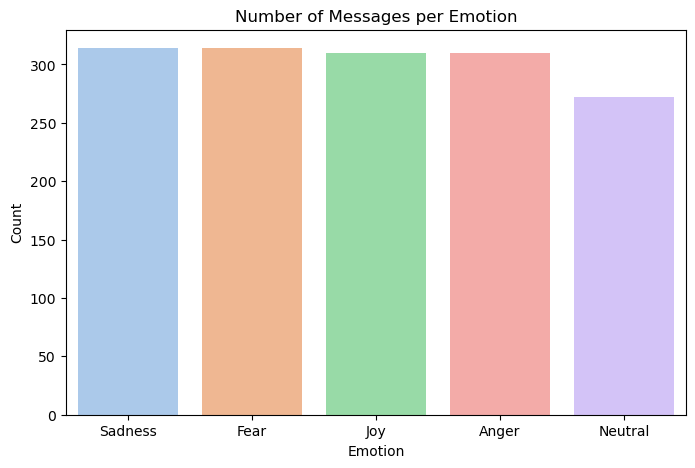

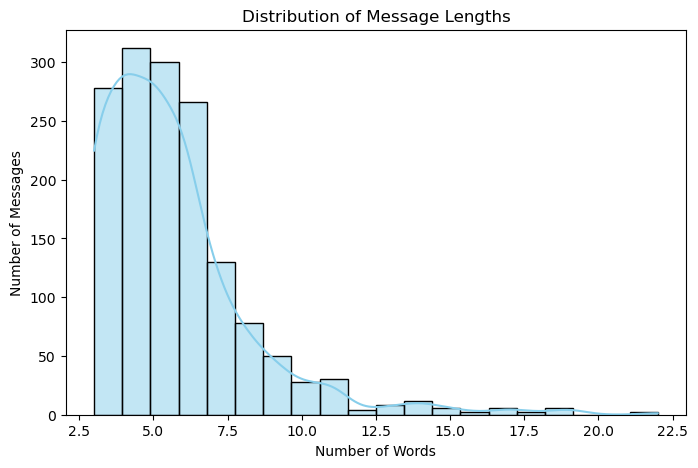

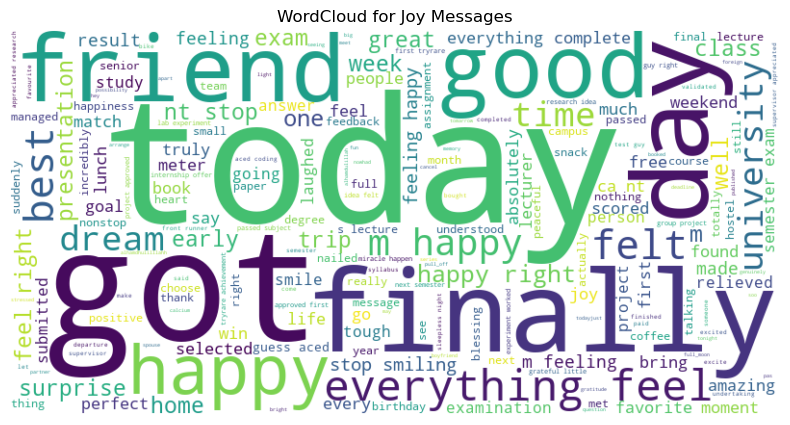

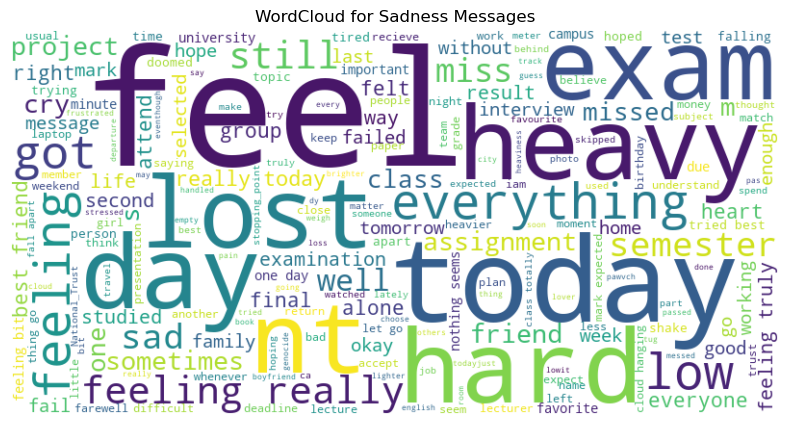

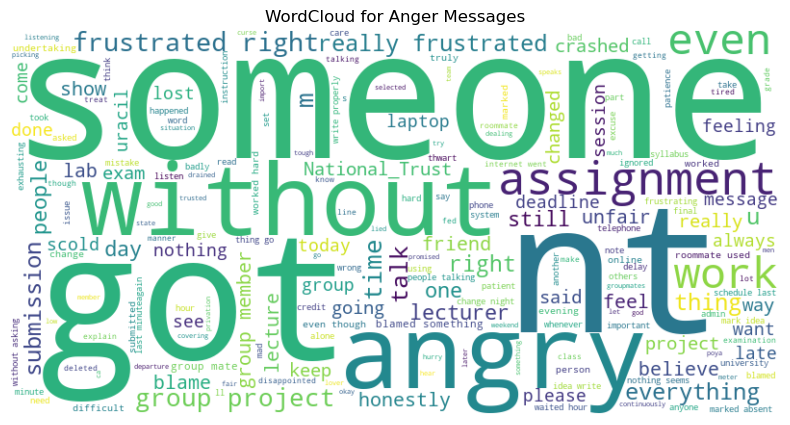

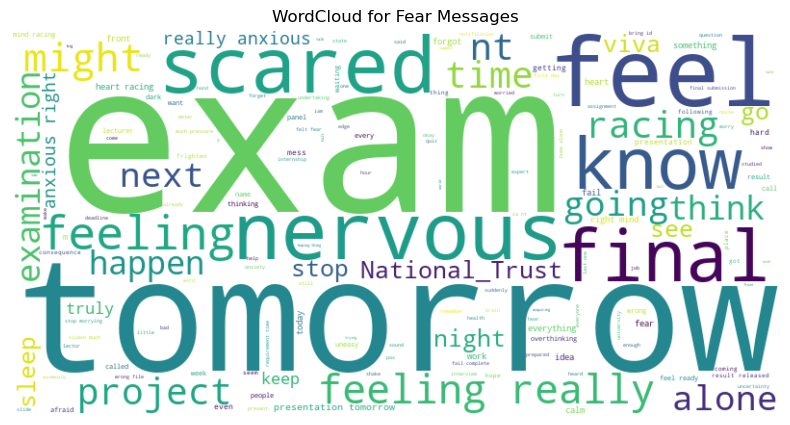

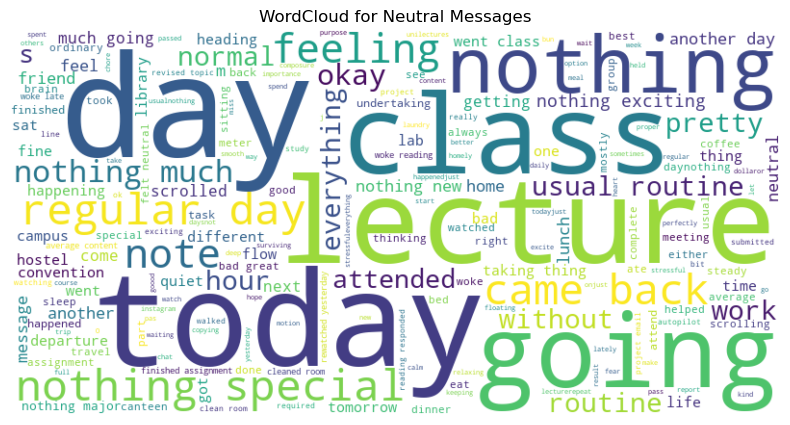

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load augmented dataset
file_path = r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_augmented.csv"
df = pd.read_csv(file_path)

# ---------------------------
# 1️⃣ Quick Stats
# ---------------------------
# Total messages
total_messages = len(df)
print(f"✅ Total messages: {total_messages}")# Average message length
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
avg_length = df['word_count'].mean()
print(f"✅ Average message length (in words): {avg_length:.2f}")

# Count of messages per emotion
emotion_counts = df['emotion'].value_counts()
print("\n✅ Messages per emotion:")
print(emotion_counts)

# ---------------------------
# 2️⃣ Bar Chart: Emotion Distribution
# ---------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="pastel")
plt.title("Number of Messages per Emotion")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()
# ---------------------------
# 3️⃣ Histogram: Message Lengths
# ---------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Message Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Number of Messages")
plt.show()
# ---------------------------
# 4️⃣ WordClouds for each emotion
# ---------------------------
emotions = df['emotion'].unique()
for emo in emotions:
    text = ' '.join(df[df['emotion'] == emo]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {emo} Messages")
    plt.show()

In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Shimra\Desktop\EmotiSense\processed\emotion_augmented.csv")

# Show all column names
print("🔎 Columns in dataset:")
print(df.columns.tolist())

# Try to detect the message/text column
possible_text_cols = ["message", "text", "sentence", "Message", "Text", "Sentence", "message_text"]

text_col = None
for col in df.columns:
    if col in possible_text_cols:
        text_col = col
        break

if text_col:
    print(f"\n✅ Using '{text_col}' as the text column\n")

    # Calculate message length (in words)
    df['message_length'] = df[text_col].apply(lambda x: len(str(x).split()))

    # Show statistics
    print("📊 Message Length Statistics:")
    print(df['message_length'].describe())

    print("\nAverage message length (in words):", round(df['message_length'].mean(), 2))
else:
    print("\n⚠️ No text column detected. Please check your dataset.")


🔎 Columns in dataset:
['text', 'emotion']

✅ Using 'text' as the text column

📊 Message Length Statistics:
count    1520.000000
mean        5.598684
std         2.619771
min         3.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        22.000000
Name: message_length, dtype: float64

Average message length (in words): 5.6
